In [1]:
import datetime
x = datetime.datetime.now()
print(x)

2020-03-21 23:43:49.549305


In [1]:
# Load data from Google drive 
from google.colab import drive
drive.mount('/content/gdrive')
my_path = "/content/gdrive/My Drive/ColabNotebooks/EVA4/Utilies"

import sys
sys.path.append(my_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls /content/gdrive/My\ Drive/ColabNotebooks/EVA4/Utilies

displayimages.py  gradcam.py   quizdnn.py     training.py    transformation.py
dnn.py		  __pycache__  showimages.py  train_test.py  utilis.py


In [3]:
# Import all modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
import os
from torch.optim.lr_scheduler import StepLR

In [0]:
#Below are the created modules
import quizdnn
import dnn
import training
import transformation 
import showimages
import displayimages
import gradcam 
import utilis
import train_test

In [0]:
train_transforms , test_transforms=transformation.AlbumentationWrapper('train'), transformation.AlbumentationWrapper('test')


In [6]:
classes,trainloader, testloader = transformation.dataloaders(1, 128, 10, train_transforms , test_transforms)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


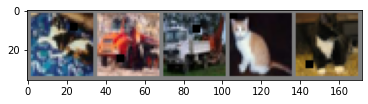

In [7]:
displayimages.show_random_image(trainloader,classes)


In [8]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = quizdnn.quizdnn(1.0).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]              96
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
            Conv2d-8           [-1, 64, 32, 32]           2,048
            Conv2d-9           [-1, 64, 32, 32]           2,048
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,864
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [11]:
EPOCHS =20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    training.train(model, device, trainloader, optimizer, epoch, False)
    train_test.test(model, device, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.2354286909103394 Batch_id=390 Accuracy=47.80: 100%|██████████| 391/391 [00:20<00:00, 19.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5341/10000 (53.41%)

EPOCH: 1


Loss=1.0166951417922974 Batch_id=390 Accuracy=62.12: 100%|██████████| 391/391 [00:20<00:00, 18.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6313/10000 (63.13%)

EPOCH: 2


Loss=1.0856705904006958 Batch_id=390 Accuracy=68.00: 100%|██████████| 391/391 [00:20<00:00, 18.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6422/10000 (64.22%)

EPOCH: 3


Loss=0.7207404375076294 Batch_id=390 Accuracy=71.51: 100%|██████████| 391/391 [00:20<00:00, 18.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7001/10000 (70.01%)

EPOCH: 4


Loss=0.7385491132736206 Batch_id=390 Accuracy=74.41: 100%|██████████| 391/391 [00:20<00:00, 18.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7222/10000 (72.22%)

EPOCH: 5


Loss=0.6558672189712524 Batch_id=390 Accuracy=76.40: 100%|██████████| 391/391 [00:20<00:00, 18.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7152/10000 (71.52%)

EPOCH: 6


Loss=0.7385725378990173 Batch_id=390 Accuracy=77.91: 100%|██████████| 391/391 [00:20<00:00, 18.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7533/10000 (75.33%)

EPOCH: 7


Loss=0.7041822671890259 Batch_id=390 Accuracy=79.42: 100%|██████████| 391/391 [00:20<00:00, 18.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7712/10000 (77.12%)

EPOCH: 8


Loss=0.5861147046089172 Batch_id=390 Accuracy=80.51: 100%|██████████| 391/391 [00:20<00:00, 18.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7554/10000 (75.54%)

EPOCH: 9


Loss=0.4797917902469635 Batch_id=390 Accuracy=81.29: 100%|██████████| 391/391 [00:20<00:00, 18.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7784/10000 (77.84%)

EPOCH: 10


Loss=0.5736203789710999 Batch_id=390 Accuracy=82.20: 100%|██████████| 391/391 [00:20<00:00, 18.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7907/10000 (79.07%)

EPOCH: 11


Loss=0.3215397000312805 Batch_id=390 Accuracy=82.65: 100%|██████████| 391/391 [00:20<00:00, 19.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7935/10000 (79.35%)

EPOCH: 12


Loss=0.5772513151168823 Batch_id=390 Accuracy=83.23: 100%|██████████| 391/391 [00:20<00:00, 18.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7984/10000 (79.84%)

EPOCH: 13


Loss=0.3976983428001404 Batch_id=390 Accuracy=83.76: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7864/10000 (78.64%)

EPOCH: 14


Loss=0.6099702715873718 Batch_id=390 Accuracy=84.38: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8086/10000 (80.86%)

EPOCH: 15


Loss=0.3882105052471161 Batch_id=390 Accuracy=84.89: 100%|██████████| 391/391 [00:22<00:00, 17.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7933/10000 (79.33%)

EPOCH: 16


Loss=0.39617350697517395 Batch_id=390 Accuracy=85.21: 100%|██████████| 391/391 [00:20<00:00, 18.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8036/10000 (80.36%)

EPOCH: 17


Loss=0.23641183972358704 Batch_id=390 Accuracy=85.71: 100%|██████████| 391/391 [00:21<00:00, 18.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8077/10000 (80.77%)

EPOCH: 18


Loss=0.5114734172821045 Batch_id=390 Accuracy=85.90: 100%|██████████| 391/391 [00:20<00:00, 18.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7988/10000 (79.88%)

EPOCH: 19


Loss=0.459483802318573 Batch_id=390 Accuracy=86.33: 100%|██████████| 391/391 [00:21<00:00, 18.35it/s]



Test set: Average loss: 0.0047, Accuracy: 8085/10000 (80.85%)

